In [1]:
onedrive = r"C:\Users\mikek\OneDrive"
# %matplotlib ipympl
# %matplotlib qt
# %matplotlib widget
# %matplotlib qt

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
import scipy
import re

# sys.path.append(r"C:\Users\Mike\OneDrive\Project\sdtools")
sys.path.append(os.path.join(onedrive,r"Project\python-packages\sdtools"))
sys.path.append(r'C:\Users\mikek\OneDrive\Project\python-packages')

from gridtools.hypnotoad_tools import *
from gridtools.b2_tools import *
from gridtools.utils import *

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from code_comparison.code_comparison import *

import gridtools.solps_python_scripts.setup
from gridtools.solps_python_scripts.plot_solps       import plot_1d, plot_2d
import ipywidgets as widgets

%load_ext autoreload
%autoreload 2


print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Done


In [ ]:
sys.path.append(r'C:\Users\mikek\OneDrive\Project\python-packages\gridtools\soledge')

In [ ]:
from custom-plots import *

In [3]:
import h5py
import os
import numpy as np
import matplotlib.pyplot				as pyp
import matplotlib.tri						as tri
from matplotlib.backends.backend_pdf	import PdfPages
from matplotlib.colors 					import LogNorm
from matplotlib.path 						import Path
from routines.utils_walls				import plot2d_walls
from routines.h5_routines				import h5_read
from mesh.get_rz_core_sep			import get_rz_core_sep
from files.load_refpar_file				import load_refpar_file
from files.load_plasma_files			import load_plasma_files
from files.load_soledge_mesh_file	import load_soledge_mesh_file
from files.load_ions_list				import load_ions_list
from files.save_stat					import save_stat

In [43]:
path = r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\run_directory"
diff = 0
evolution = [0]
plot_neutrals = 1

if_tri	 = h5py.File(os.path.join(path,"triangles.h5"), "r")

TriKnots = h5_read(if_tri,"triangles/tri_knots")
TriKnots = TriKnots - 1 										#Matlab/Fortan to python indexes
R		 = h5_read(if_tri,"knots/R")*0.01
Z		 = h5_read(if_tri,"knots/Z")*0.01
if_tri.close()
Config = load_soledge_mesh_file(os.path.join(path, "mesh.h5"))			#	load mesh
nZones  = len(Config.Zones)
 
Plasmas = load_plasma_files(path, nZones=nZones, Evolution=evolution[0], ToKnodes = diff)



load_soledge_mesh_file: reading file  C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\run_directory\mesh.h5
	load_soledge_mesh_file: in_equ = OK
	h5_read: error reading:  /mesher/Fields/RadArroundXp
	load_soledge_mesh_file: extrapol = OK
	load_soledge_mesh_file: xPoints = OK
	load_soledge_mesh_file: Frontiers = OK
	load_soledge_mesh_file: Limits = OK
	h5_read: error reading:  /mesher/OMP_segment/mesher/refpoints/nPoints
	load_soledge_mesh_file: Segments = OK
	load_soledge_mesh_file: MagGrid_OK = OK
	load_soledge_mesh_file: new_equ = OK
	load_soledge_mesh_file: equ = OK
	load_soledge_mesh_file: Mesh = OK
	load_soledge_mesh_file: transp_prof = OK
	load_soledge_mesh_file: transp_values = OK
	h5_read: error reading:  /mesher/FeedbackTransp/Dmin
	load_soledge_mesh_file: feedback_transp = NO
	h5_read: error reading:  /mesher/FeedbackPuffing/AutoTarget
	load_soledge_mesh_file: feedback_puffing = NO
	h5_read: error reading:  /CustomPlots/Parallel/nPlots
	h5_read: error reading:  /Cust

In [15]:
%matplotlib widget

In [44]:
nPlasmas = len(Plasmas)
for iPlasma in range(nPlasmas):
    if(iPlasma == 0):
        Labels = [["$n\ (*10^{19}\ m^{-3})$", "$T\ (keV)$",  "$Z_{eff}$", 
                    "$Rad_{tot} (kW/m^3)$", "$Rad_{neu} (kW/m^3)$", "$S_{ne}\ (*10^{19}\ m^{-3}s^{-1})$"]]
        Pars   = [["Dens", "Temp","Zeff ","TotRad ","TotNRad ","Sn"]]
        PosPars = [[True, True, True, True, True,True]]
        NrowNcol = [[3,2]]
        Facts		  	  = [[1e-19,1.e-3, 1., 1e-3,1.e-3,1.e-19]]
        FactsUnits		  = [["10^19","10^3", "1.","10^3","10^3","10^19"]]
        MaxRange	      = [[1.e5,0., 0., 1.e5, 1.e5,0.]]
        PrintAllVolSumAve = [[1, 0, 0, 1, 1, 1]]								#1 for sum, 2 for ave, 3 for sum and ave
        PrintInSepSumAve  = [[3, 0, 2, 1, 1, 0]]
        PrintOutSepSumAve = [[0, 0, 0, 1, 1, 1]]
        PrintOnSepSumAve  = [[2, 2, 2, 0, 0, 1]]

    elif(iPlasma == 1):
        if(plot_neutrals):
            Labels = [["$n\ (*10^{19}\ m^{-3})$", "$T\ (keV)$",  "$M$", "$Rad_{tot} (kW/m^3)$", "$Rad_{neu} (kW/m^3)$", "$Rad_{ion} (kW/m^3)$"], \
                        ["$n_{n}\ (*10^{19}\ m^{-3})$","$n_{m}\ (*10^{19}\ m^{-3}$","$P_n\ (Pa)$", "$T_n\ (K)$", "$T_m\ (K)$", "$n_H/n_e$"]]
            Pars   = [["Dens", "Temp", "M", "TotRad", "NRad", "IRad"], \
                        ["Nn",  "Nm", "Pn", "Tn", "Tm","FracDens"]]
            PosPars = [[True, True, False, True, True, True], \
                        [True,    True, True, True, True, False]]
            NrowNcol = [[3,2],[3,2]]
            Facts  	 		  = [[1e-19, 1.e-3, 1., 1e-3,1.e-3,1.e-3],[1.e-19, 1.e-19,1, 1., 1., 1.]]
            FactsUnits 		  = [["10^19", "10^3", "1.", "10^3","10^3","10^3"],["10^19", "10^19","1.","1.","1.", "1."]]
            MaxRange		  = [[1.e5, 0., 0., 1.e5, 1.e5, 1.e5],[0., 0.,1.e3, 0.,0.,0.]]
            PrintAllVolSumAve = [[1, 0, 0, 1, 1, 1], [1, 1, 0, 0, 1, 0]]
            PrintInSepSumAve  = [[1, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 2]]
            PrintOutSepSumAve = [[0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0]]
            PrintOnSepSumAve  = [[2, 2, 0, 0, 0, 0], [0, 0, 0, 0, 0, 2]]
        else:
            Labels = [["$n\ (*10^{19}\ m^{-3})$", "$T\ (keV)$",  "$M$", "$Rad_{tot} (kW/m^3)$", "$Rad_{neu} (kW/m^3)$", "$Rad_{ion} (kW/m^3)$"], \
                        ["$S_{ni}\ (*10^{19}\ m^{-3}s^{-1})$","$S_{Ei}\ (MW/m^{3})$","$P_n\ (Pa)$", "$P_p\ (P)$", "$E_p\ (MJ/m^3)$", "$n_H/n_e$"]]
            Pars   = [["Dens", "Temp", "M", "TotRad", "NRad", "IRad"], \
                        ["Sn",    "SE", "Pn", "Pp", "Ep","FracDens"]]
            PosPars = [[True, True, False, True, True, True], \
                        [True,    True, True, True, True, False]]
            NrowNcol = [[3,2],[3,2]]
            Facts  	 		  = [[1e-19, 1.e-3, 1., 1e-3,1.e-3,1.e-3],[1.e-19, 1.e-6,1., 1.,1.e-6, 1.]]
            FactsUnits 		  = [["10^19", "10^3", "1.", "10^3","10^3","10^3"],["10^19", "10^6","1.", "1.","10^6", "1."]]
            MaxRange		  = [[1.e5, 0., 0., 1.e5, 1.e5, 1.e5],[0., 0.,1.e3, 0.,0.,0.]]
            PrintAllVolSumAve = [[1, 0, 0, 1, 1, 1], [0, 0, 0, 0, 1, 0]]
            PrintInSepSumAve  = [[3, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 2]]
            PrintOutSepSumAve = [[0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0]]
            PrintOnSepSumAve  = [[2, 2, 0, 0, 0, 0], [0, 0, 0, 0, 0, 2]]

    elif(Plasmas[iPlasma][0].charge == 1):
        if(plot_neutrals):
            Labels = [["$n\ (*10^{19}\ m^{-3})$", "$n\ (*10^{19}\ m^{-3})$",  "$n_{Tot}\ (*10^{19}\ m^{-3})$", "$Rad_{tot} (kW/m^3)$", "$Rad_{neu} (kW/m^3)$", "$Rad_{ion} (kW/m^3)$","$n_{tot}/n_e$", "$n_{Itot}/n_D$"]]
            Pars   = [["Nn", "Dens", "TDens", "TotRad", "NRad", "IRad","FracDens","Cimp"]]
            PosPars = [[True, True, True, True, True, True, True, True]]
            NrowNcol = [[4,2]]
            Facts  	 = [[1e-19,1e-19, 1.e-19, 1e-3,1.e-3,1.e-3, 1., 1.]]
            FactsUnits = [["10^19","10^3","10^19","10^3","10^3","10^3","1.","1."]]
            MaxRange	      = [[1.e3,1.e3, 1.e3, 1.e5, 1.e5,1.e5, 0.,0.]]
            PrintAllVolSumAve = [[1, 0, 1, 1, 1, 1, 0, 0]]
            PrintInSepSumAve  = [[2, 0, 2, 1, 1, 1, 2, 2]]
            PrintOutSepSumAve = [[0, 0, 0, 1, 1, 1, 0,0]]
            PrintOnSepSumAve  = [[0, 0, 0, 0, 0, 0, 2, 2]]
        else:
            Labels = [["$n\ (*10^{19}\ m^{-3})$", "$T\ (keV)$",  "$Sn\ (*10^{19}\ m^{-3}s^{-1})$", "$Rad_{tot} (kW/m^3)$", "$Rad_{neu} (kW/m^3)$", "$Rad_{ion} (kW/m^3)$","$Tot-n_Z$", "$n_{Itot}/n_D$"]]
            Pars   = [["Dens", "Temp", "Sn", "TotRad", "NRad", "IRad","FracDens","Cimp"]]
            PosPars = [[True, True, True, True, True, True, True, True]]
            NrowNcol = [[4,2]]
            Facts  	 = [[1e-19,1.e-3, 1.e-19, 1e-3,1.e-3,1.e-3,1.,1.]]
            FactsUnits = [["10^19","10^3","10^19","10^3","10^3","10^3","1.","1."]]
            MaxRange	      = [[1.e5,0., 0., 1.e5, 1.e5,1.e5, 0.,0.]]
            PrintAllVolSumAve = [[1, 0, 0, 1, 1, 1, 0, 0]]
            PrintInSepSumAve  = [[2, 0, 0, 1, 1, 1, 2, 2]]
            PrintOutSepSumAve = [[0, 0, 0, 1, 1, 1, 0, 2]]
            PrintOnSepSumAve  = [[0, 0, 0, 0, 0, 0, 2, 2]]

    else:
        Labels   = [["$n\ (*10^{19}\ m^{-3})$", "$T\ (keV)$",  "$Rad_{ion} (kW/m^3)$"]]
        Pars     = [["Dens", "Temp", "IRad"]]
        PosPars = [[True, True, True]]
        NrowNcol = [[2,2]]
        Facts  	 = [[1e-19,1.e-3, 1e-3]]
        FactsUnits = [["10^19","10^3","10^3"]]
        MaxRange	      = [[1.e5,0., 0., 1.e5]]
        PrintAllVolSumAve = [[1, 0, 1]]
        PrintInSepSumAve  = [[0, 0, 1]]
        PrintOutSepSumAve = [[0, 0, 1]]
        PrintOnSepSumAve  = [[0, 0, 0]]

    if(iPlasma == 0):	NameExt = "e"
    elif(iPlasma == 1):	NameExt = "i"

In [46]:
Pars

[['Dens', 'Temp', 'M', 'TotRad', 'NRad', 'IRad'],
 ['Nn', 'Nm', 'Pn', 'Tn', 'Tm', 'FracDens']]

In [49]:
Plasmas[iPlasma][0].Triangles.Values[iPar].shape

(6669,)

In [52]:
len(Z)*2

7084

In [64]:
R.shape

(3542,)

In [65]:
Plasmas[iPlasma][0].Triangles.Values

[array([7.99789307e+19, 7.99791172e+19, 7.99801437e+19, ...,
        4.77363065e+16, 1.76015114e+17, 1.28279325e+17]),
 array([1659.15390488, 1659.15401803, 1659.15422835, ...,    7.99973871,
          12.2874999 ,   10.76226427]),
 array([  -218.64766017,   -219.74729803,   -227.17666272, ...,
        -38961.56245585, -60638.68783346, -59483.97550524]),
 array([1., 1., 1., ..., 1., 1., 1.]),
 array([1., 1., 1., ..., 1., 1., 1.]),
 array([4.24130772e+20, 5.81553842e+20, 7.65415320e+20, ...,
        2.61154213e+19, 4.32465676e+20, 2.22516098e+20]),
 array([-1692.4436648 , -2287.29844215, -2981.94167727, ...,
         -165.48648264, -2268.97061352, -1172.12627977]),
 array([ 769.2661056 , 1021.09727224, 1315.10781741, ...,   50.09547335,
         475.9921793 ,  243.12630553]),
 array([ 768.2661056 , 1020.09727224, 1314.10781741, ...,   49.09547335,
         474.9921793 ,  242.12630553])]

ValueError: z array must have same length as triangulation x and y arrays

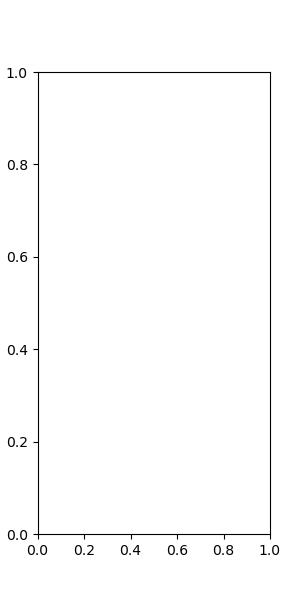

In [54]:
TripTriang = tri.Triangulation(R, Z, triangles=TriKnots)

plt.close("all")
fig, ax = plt.subplots(figsize = (3,6), dpi = 100)
iPlasma = 0  # 0 is e, 1 is i
if(iPlasma == 0):	NameExt = "e"
elif(iPlasma == 1):	NameExt = "i"

Par = "Temp" + NameExt

iPar = Plasmas[iPlasma][0].Triangles.VNames.index(Par)	# Index of Par 

# ax.tricontour(TripTriang, Plasmas[iPlasma][0].Triangles.Values[iPar], [0.], vmin=None, vmax=None, colors='k')
ax.tricontourf(R, Z, TriKnots, Plasmas[iPlasma][0].Triangles.Values[iPar], cmap = "Spectral_r")

In [39]:
Plasmas[0][0].Triangles.VNames

['Dense',
 'Tempe',
 'velocitye',
 'IRade',
 'Zeff',
 'Sne',
 'SEe',
 'TotRad',
 'TotNRad']

In [12]:
slpath = r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\run_directory"
plot2d_on_tri(path = slpath)

plot2d_on_tri
load_soledge_mesh_file: reading file  C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\run_directory/mesh.h5
	load_soledge_mesh_file: in_equ = OK
	h5_read: error reading:  /mesher/Fields/RadArroundXp
	load_soledge_mesh_file: extrapol = OK
	load_soledge_mesh_file: xPoints = OK
	load_soledge_mesh_file: Frontiers = OK
	load_soledge_mesh_file: Limits = OK
	h5_read: error reading:  /mesher/OMP_segment/mesher/refpoints/nPoints
	load_soledge_mesh_file: Segments = OK
	load_soledge_mesh_file: MagGrid_OK = OK
	load_soledge_mesh_file: new_equ = OK
	load_soledge_mesh_file: equ = OK
	load_soledge_mesh_file: Mesh = OK
	load_soledge_mesh_file: transp_prof = OK
	load_soledge_mesh_file: transp_values = OK
	h5_read: error reading:  /mesher/FeedbackTransp/Dmin
	load_soledge_mesh_file: feedback_transp = NO
	h5_read: error reading:  /mesher/FeedbackPuffing/AutoTarget
	load_soledge_mesh_file: feedback_puffing = NO
	h5_read: error reading:  /CustomPlots/Parallel/nPlots
	h5_read: error r

In [2]:
%matplotlib widget

In [37]:
db = CaseDB()

toload = [
    dict(name="base", id="c3c-1.383e6", grid="g3b2-fatter_newhypno.nc"),
    dict(name="puff", id="c7a-c4e_aa_fix", grid="g3b2-fatter_newhypno.nc"),
    dict(name="sources", id="d2a-d1a_aa_fix", grid="g3b2-fatter_newhypno.nc" )
]

casestore = dict()

for case in toload:
    casestore[case["name"]] = Load.case_2D(db.casepaths[case["id"]], gridfilepath = db.gridpaths[case["grid"]],double_load = False, keep_boundaries = False)

--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.556E+00 [m3]
--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.556E+00 [m3]
--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.556E+00 [m3]


b2fgmtry loaded from .pkl
b2fstate loaded from .pkl
b2fplasmf loaded from .pkl
fort.44 loaded from .pkl
fort.46 loaded from .pkl


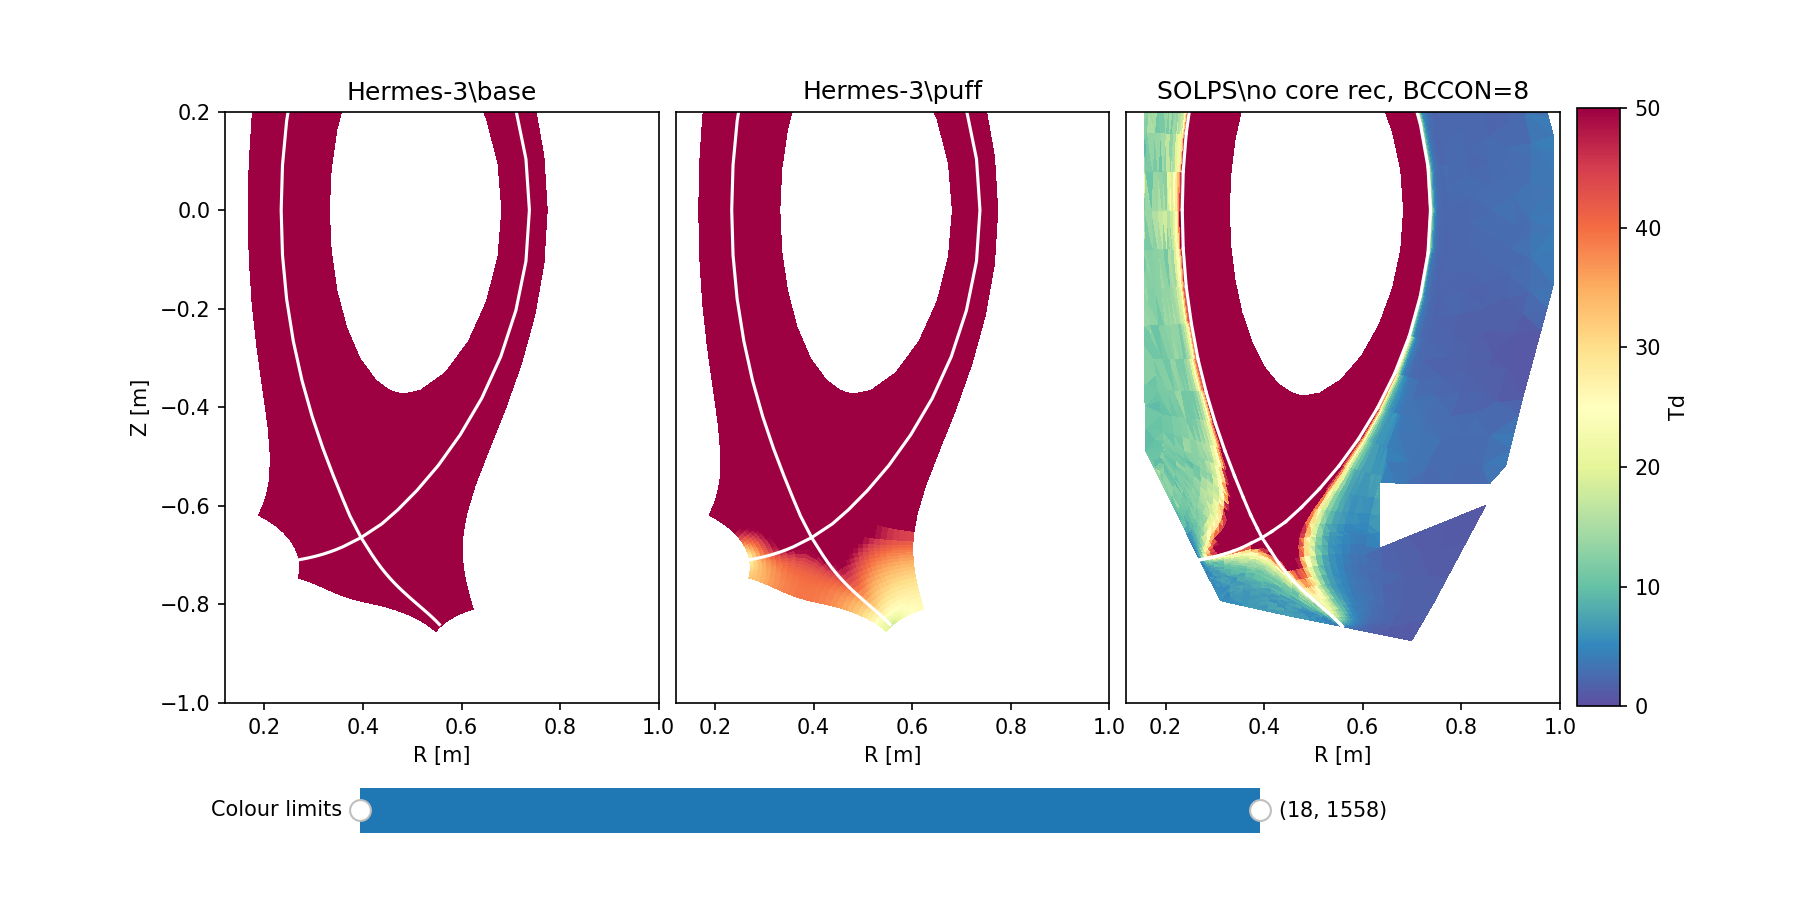

In [49]:
plt.close("all")
v = viewer_2d(
    param = "Td",
    cases =     {
        "base" : {"code" : "hermes", "ds" : casestore["base"].ds.isel(t=-1)},
        "puff" : {"code" : "hermes", "ds" : casestore["puff"].ds.isel(t=-1)},
        # "solps_base" : {"code" : "solps", "path" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF"},
        "no core rec, BCCON=8" : {"code" : "solps", "path" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=8"}
        },
    vmin = 0,
    vmax = 50,
    xlim = (0.12, 1.0),
    ylim = (-1,0.2),
    logscale = False,
    dpi = 150
    )

b2fgmtry loaded from .pkl
b2fstate loaded from .pkl
b2fplasmf loaded from .pkl
fort.44 loaded from .pkl
fort.46 loaded from .pkl


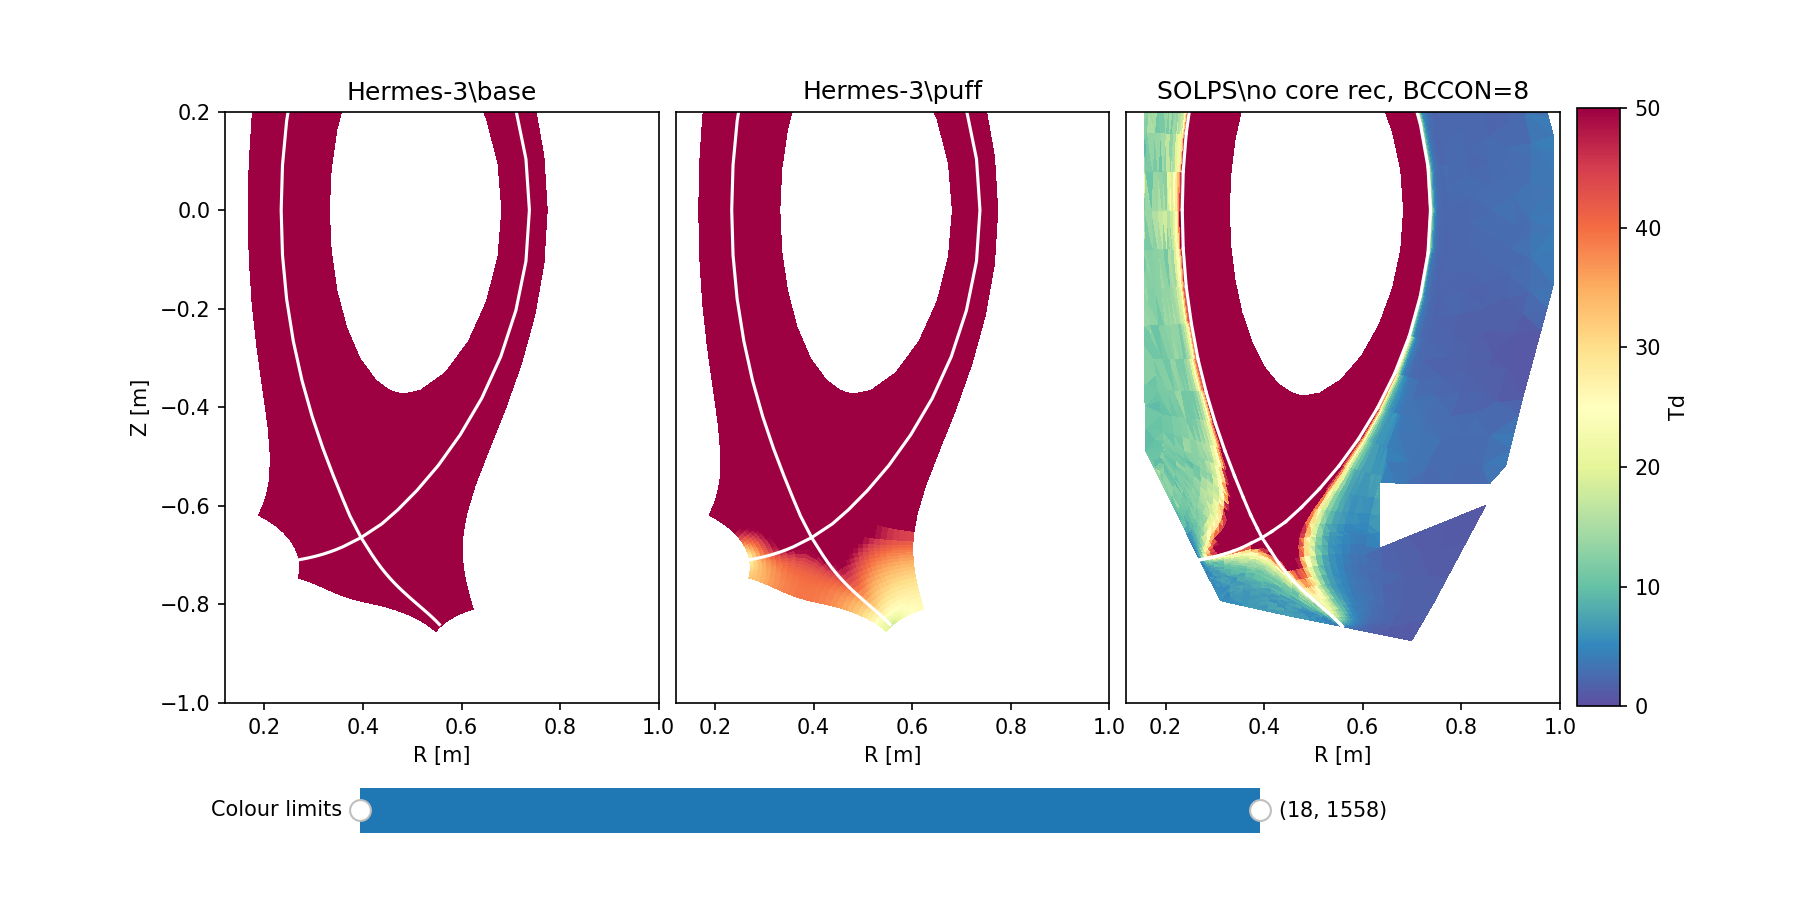

In [ ]:
plt.close("all")
v = viewer_2d(
    param = "Td",
    cases =     {
        "base" : {"code" : "hermes", "ds" : casestore["base"].ds.isel(t=-1)},
        "puff" : {"code" : "hermes", "ds" : casestore["puff"].ds.isel(t=-1)},
        # "solps_base" : {"code" : "solps", "path" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF"},
        "no core rec, BCCON=8" : {"code" : "solps", "path" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=8"}
        },
    vmin = 0,
    vmax = 50,
    xlim = (0.12, 1.0),
    ylim = (-1,0.2),
    logscale = False,
    dpi = 150
    )

In [8]:
print()

In [73]:
%matplotlib qt

In [11]:
plot_2d(fig, ax, where = r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF", what = "pdenn")

b2fgmtry loaded from .pkl
b2fstate loaded from .pkl
b2fplasmf loaded from .pkl
fort.44 loaded from .pkl
fort.46 loaded from .pkl


In [218]:
fig, ax = plt.subplots(figsize=(4,8), dpi = 150)
casestore["base"].ds.isel(t=-1)["Ne"].bout.polygon(ax = ax, cmap = "Spectral_r", separatrix = True, antialias = True)

'linear'

b2fgmtry loaded from .pkl
b2fstate loaded from .pkl
b2fplasmf loaded from .pkl
fort.44 loaded from .pkl
fort.46 loaded from .pkl


0

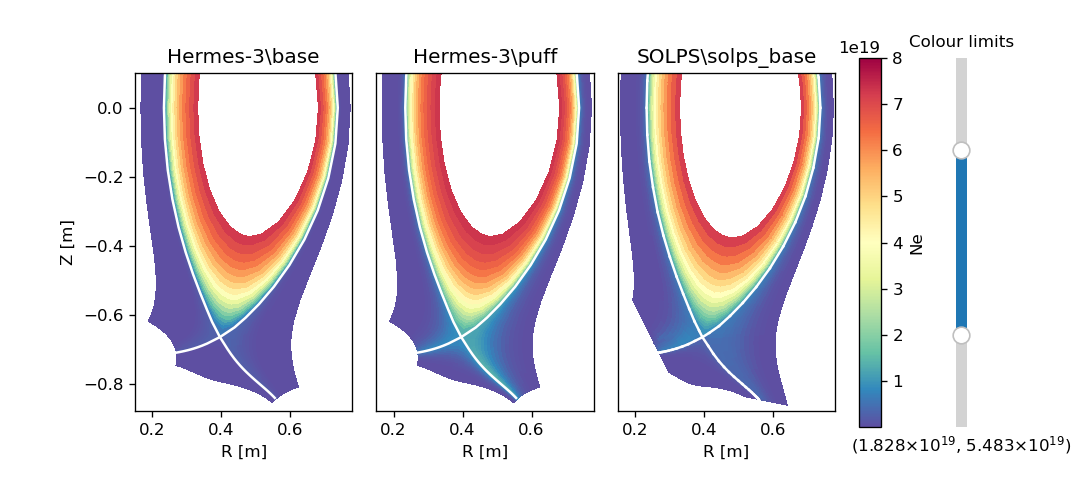

In [62]:
self = v

param = "Ne"
cases =     {
    "base" : {"code" : "hermes", "ds" : casestore["base"].ds.isel(t=-1)},
    "puff" : {"code" : "hermes", "ds" : casestore["puff"].ds.isel(t=-1)},
    "solps_base" : {"code" : "solps", "path" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF"}
    }

vmin = 1e17
vmax = 8e19
logscale = True
    

cmap = "Spectral_r"
logscale = False


self.param = param
self.cases = cases
num_cases = len(cases.keys())
self.max, self.min = self.find_ranges()

# Find ranges if not provided
if vmin == None:
    vmin = min
if vmax == None:
    vmax = max

fig = plt.figure(dpi=120)
fig.set_figheight(4)
fig.set_figwidth(num_cases*3)

spec = mpl.gridspec.GridSpec(ncols=num_cases+3, nrows=1,
                                width_ratios = [1]*num_cases + [0.1] + [0.1] + [0.1], # cbar, empty space, control
                                )

axes = [None]*(num_cases+3)


for i, casename in enumerate(cases.keys()):
    
    # All plots after the first one share x and y axes
    if i == 0:
        axes[i] = fig.add_subplot(spec[i])
    else:
        axes[i] = fig.add_subplot(spec[i], sharex=axes[0], sharey=axes[0])
    
    model = cases[casename]
    
    if model["code"] == "hermes":
        model["ds"][param].bout.polygon(ax = axes[i], add_colorbar = False, logscale = logscale, separatrix = True, cmap = cmap, vmin = vmin, vmax = vmax, antialias = False)
        
        
        # axes[i].plot(model["ds"]["R"])
        axes[i].set_title(f"Hermes-3\{casename}")
        
    elif model["code"] == "solps":
        plot_2d(fig, axes[i], where = model["path"], what = self.name_parser(param,"solps"), cmap = "Spectral_r", scale = ("log" if logscale is True else "linear"), vmin = vmin, vmax = vmax, plot_cbar = False)
        axes[i].set_title(f"SOLPS\{casename}")
        
    axes[i].set_ylim(-0.88,0.1)
    axes[i].set_xlim(0.15, 0.78)
    
    # Take out Y markings from plots after first one
    if i != 0:
        axes[i].set_ylabel("")
        axes[i].set_xlabel("R [m]")
        axes[i].tick_params(axis="y", which="both", left=False,labelleft=False)
        
# Add colorbar
axes[-3] = fig.add_subplot(spec[-3])   
norm = xbout.plotting.utils._create_norm(logscale, None, vmin, vmax)
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = plt.colorbar(mappable = sm, cax = axes[-3], label = param)

# Add widget
axes[-1] = fig.add_subplot(spec[-1])

# axes[-1] = fig.add_axes([0.8, 0.2, 0.65, 0.5])
slider = RangeSlider(
    axes[-1], "Colour limits",
    self.min, self.max,
    orientation = "vertical",
    )

artists = [axes[i].collections[0] for i in range(num_cases)]
# artists = artists.append(cbar)

def update(val):
    slider.ax.set_ylim(self.min, self.max) # This is inexplicably needed otherwise it freezes
    
    cbar.norm.vmin = val[0]
    cbar.norm.vmax = val[1]
        
    for i, artist in enumerate(artists):
        if cases[list(cases.keys())[i]]["code"] == "solps" and logscale == True:
            artist.norm.vmin = np.log10(val[0])
            artist.norm.vmax = np.log10(val[1])
        else:
            artist.norm.vmin = val[0]
            artist.norm.vmax = val[1]
        
        fig.canvas.draw_idle()
        fig.canvas.flush_events() # https://stackoverflow.com/questions/64789437/what-is-the-difference-between-figure-show-figure-canvas-draw-and-figure-canva
        
slider.on_changed(update)

In [49]:
artists[2].norm.vmin

3.353945351732224e+16

In [126]:
num_cases

3

(-0.8546891342273759, 0.0)

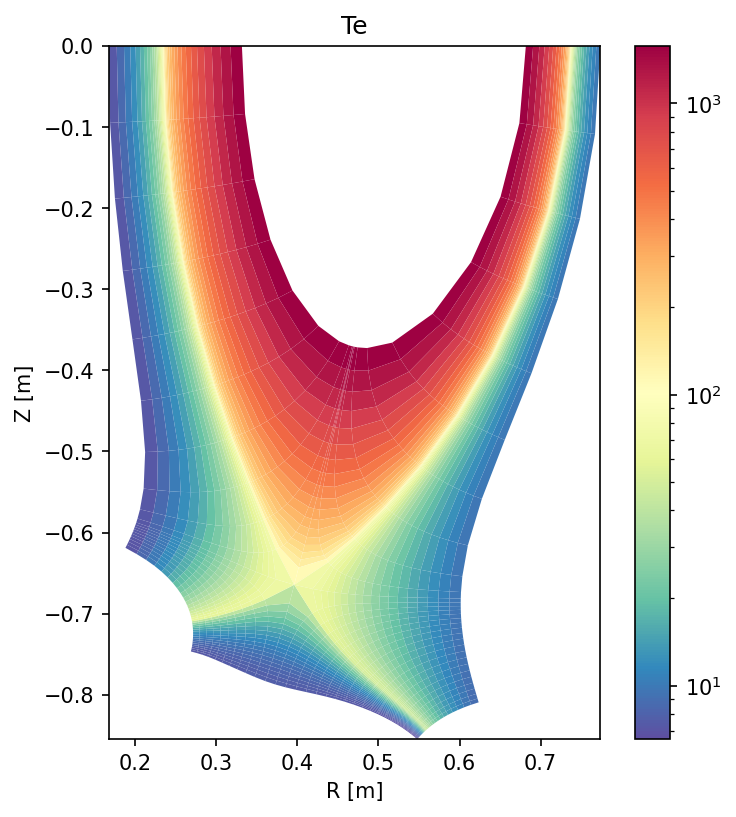

In [113]:
fig, ax = plt.subplots(figsize=(6,6), dpi = 150)

case.ds["Te"].isel(t=-1).bout.polygon(ax = ax, cmap = "Spectral_r", separatrix = False, logscale = True)
ax.set_ylim(None,0)

# Hermes polygon plot

In [4]:
m = DataFile(str(db.gridpaths[grid_choice]))

r_points = ["Rxy", "Rxy_corners", "Rxy_lower_right_corners", "Rxy_upper_left_corners", "Rxy_upper_right_corners"]
z_points = ["Zxy", "Zxy_corners", "Zxy_lower_right_corners", "Zxy_upper_left_corners", "Zxy_upper_right_corners"] 
r_concat = []
z_concat = []

for i, _ in enumerate(r_points):
    r_concat.append(np.expand_dims(m[r_points[i]], axis = 2))
    z_concat.append(np.expand_dims(m[z_points[i]], axis = 2))
    
r = np.concatenate(r_concat, axis = 2)
z = np.concatenate(z_concat, axis = 2)


In [9]:
# Create cell arays in te format [Nx, Ny, i] 
# where i = [centre, lo left, lo right, hi left, hi right]
# This matches UEDGE format and is used for nice polygon patch poloidal 2D plots
if "Rxy_lower_right_corners" in ds:
    r_nodes = ["R", "Rxy_corners", "Rxy_lower_right_corners", "Rxy_upper_left_corners", "Rxy_upper_right_corners"]
    z_nodes = ["Z", "Zxy_corners", "Zxy_lower_right_corners", "Zxy_upper_left_corners", "Zxy_upper_right_corners"] 
    cell_r = np.concatenate([np.expand_dims(ds[x], axis = 2) for x in r_nodes], axis = 2)
    cell_z = np.concatenate([np.expand_dims(ds[x], axis = 2) for x in z_nodes], axis = 2)
    
    # The arrays are added to the dataset without attributes
    ds["cell_r"] = cell_r
    ds["cell_z"] = cell_z

(20, 58, 5)

In [6]:
r.shape

(20, 58, 5)

In [7]:
%matplotlib qt

In [12]:
len(cell_r)

20

In [22]:
darray

<xarray.DataArray 'Ne' (x: 20, theta: 58)>
dask.array<getitem, shape=(20, 58), dtype=float64, chunksize=(20, 7), chunktype=numpy.ndarray>
Coordinates: (12/14)
    dx                       (x, theta) float64 dask.array<chunksize=(20, 7), meta=np.ndarray>
    dy                       (x, theta) float64 dask.array<chunksize=(20, 7), meta=np.ndarray>
    dz                       (x, theta) float64 dask.array<chunksize=(20, 7), meta=np.ndarray>
    zShift                   (x, theta) float64 dask.array<chunksize=(20, 7), meta=np.ndarray>
    t                        float64 0.02088
    psi_poloidal             (x, theta) float64 -0.02454 -0.02454 ... 0.007641
    ...                       ...
    poloidal_distance        (x, theta) float64 -0.001084 -0.0007223 ... 1.696
    poloidal_distance_ylow   (x, theta) float64 -0.001119 -0.000987 ... 1.692
    total_poloidal_distance  (x) float64 1.892 2.087 2.251 2.389 ... nan nan nan
    zShift_CELL_YLOW         (x, theta) float64 0.03373 0.02978 ... -6.802
  * x                        (x) int32 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19
  * theta                    (theta) float64 0.1571 0.4712 ... 17.75 18.06
Attributes:
    current_time_index:  201
    cell_location:       CELL_CENTRE
    conversion:          1e+17
    direction_y:         Standard
    direction_z:         Standard
    long_name:           Electron density
    source:              quasineutral
    species:             e
    standard_name:       density
    time_dimension:      t
    units:               m-3
    metadata:            {'BOUT_VERSION': 5.0, 'Bnorm': 1.0, 'Cs0': 218847.35...
    options:             # Test case with constant fast anomalous diffusion, ...
    regions:             {'lower_inner_PFR': <xbout.region.Region>\n\tname\tl...
    geometry:            toroidal

(0.15631036031447573, 0.7763969633561982)

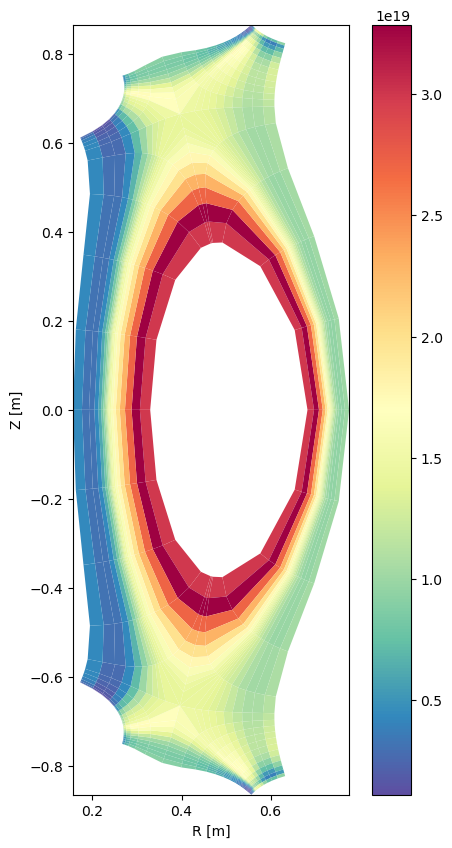

In [15]:
fig, ax = plt.subplots(figsize=(6, 10))

darray = case.ds["Ne"].isel(t=-1)

if "Rxy_lower_right_corners" in darray.coords:
    r_nodes = ["R", "Rxy_lower_left_corners", "Rxy_lower_right_corners", "Rxy_upper_left_corners", "Rxy_upper_right_corners"]
    z_nodes = ["Z", "Zxy_lower_left_corners", "Zxy_lower_right_corners", "Zxy_upper_left_corners", "Zxy_upper_right_corners"] 
    cell_r = np.concatenate([np.expand_dims(darray[x], axis = 2) for x in r_nodes], axis = 2)
    cell_z = np.concatenate([np.expand_dims(darray[x], axis = 2) for x in z_nodes], axis = 2)
else:
    raise Exception("Cell corners not present in mesh, cannot do polygon plot")

Nx = len(cell_r)
Ny = len(cell_r[0])
edgecolor = "black"
patches = []

# https://matplotlib.org/2.0.2/examples/api/patch_collection.html

idx = [np.array([1, 2, 4, 3, 1])]
patches = []
for i in range(Nx):
    for j in range(Ny):
        p = mpl.patches.Polygon(
            np.concatenate((cell_r[i][j][tuple(idx)], cell_z[i][j][tuple(idx)])).reshape(2, 5).T,
            fill=False,
            closed=True,
            edgecolor=edgecolor,
        )
        patches.append(p)


colors = darray.data.flatten()
polys = mpl.collections.PatchCollection(patches, alpha = 1, cmap = "Spectral_r", antialiaseds = True)
polys.set_array(colors)

fig.colorbar(polys, ax = ax)

ax.add_collection(polys)        
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("R [m]")
ax.set_ylabel("Z [m]")
ax.set_ylim(cell_z.min(), cell_z.max())
ax.set_xlim(cell_r.min(), cell_r.max())


# SOLPS plot

- fort44 is the EIRENE outputs over the b2 mesh.
- fort46 is the EIRENE outputs over the EIRENE mesh.

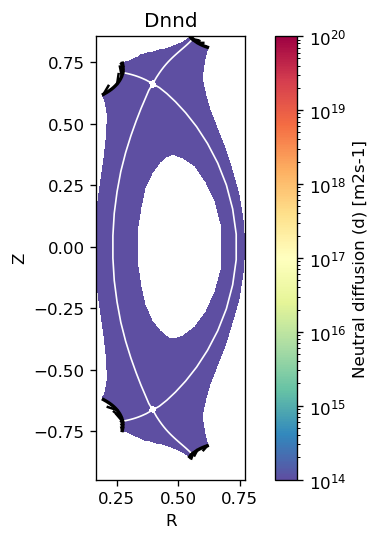

In [3]:
fig, ax = plt.subplots(dpi=120)
caseng.ds.isel(t=-1)["Dnnd"].bout.pcolormesh(ax = ax, cmap = "Spectral_r",logscale = True, vmin = 1e14, vmax = 1e20)
print("")

In [47]:
fort44 = file_read(r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK\fort.44.pkl")
fort46 = file_read(r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK\fort.46.pkl")
b2fstate = file_read(r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK\b2fstate.pkl")

In [115]:
import gridtools.solps_python_scripts.setup
from gridtools.solps_python_scripts.plot_solps       import plot_1d, plot_2d

In [119]:
%matplotlib inline


In [10]:

x = [1]*2 + [0.1]

x

[1, 1, 0.1]

NameError: name 'caseng' is not defined

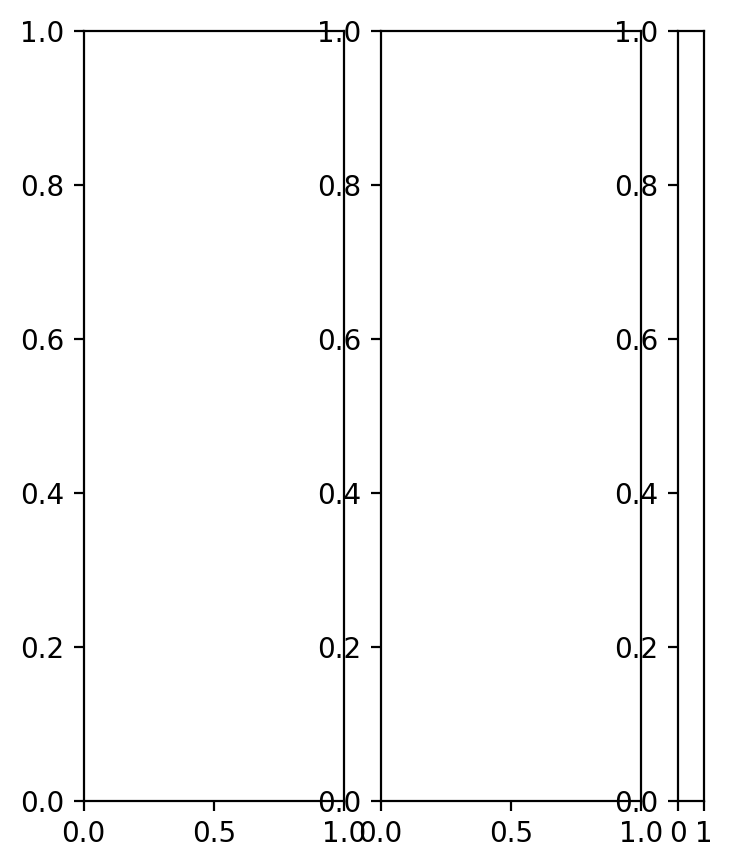

In [93]:
here = r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF"
# this = "pdena"
this = "ne"

fig = plt.figure(dpi = 200)
fig.set_figheight(5)
fig.set_figwidth(4)
spec = mpl.gridspec.GridSpec(ncols=3, nrows=1, 
                             width_ratios=[1,1,0.1], 
                             height_ratios=[1],
                             wspace=0.2)

ax1 = fig.add_subplot(spec[0])
ax2 = fig.add_subplot(spec[1], sharex=ax1, sharey=ax1)
cax = fig.add_subplot(spec[2]) 


# fig.subplots_adjust(wspace=0)

data = ds.isel(t=-1)["Ne"]
# vmin = 1e15
# vmax = 1e20
vmin = None; vmax = None

plot_2d(fig, ax1, where = here, what = this, cmap = "Spectral_r", vmin = vmin, vmax = vmax, plot_cbar = False)
data.bout.pcolormesh(ax = ax2, cax = cax, cmap = "Spectral_r", vmin = vmin, vmax = vmax, logscale = True, targets = False)

ax1.set_title("SOLPS")
ax2.set_title("Hermes-3")

ax2.set_ylabel("")
ax1.set_ylabel("Z [m]")
ax1.set_xlabel("R [m]")
ax2.set_xlabel("R [m]")

plt.setp(ax2.get_yticklabels(), visible=False)


for ax in [ax1, ax2]:
    ax.set_xlim(0.12, 0.82)
    ax.set_ylim(None, None)
    ax.set_aspect("equal")
    
# fig, ax = plt.subplots(dpi = 150)
# plot_2d(fig, ax, where = here, what = this, cmap = "Spectral_r", plot_wall = False)

fig.show()

In [ ]:
ax.set_aspec

In [26]:
from solps_python_scripts.read_ft44 import read_ft44
from solps_python_scripts.read_ft46 import read_ft46
ft44 = read_ft44(where = here, save = True)
ft46 = read_ft46(where = here)
ft46.keys()

fort.44 loaded from .pkl
fort.46 loaded from .pkl


dict_keys(['pdena', 'pdenm', 'pdeni', 'pdenan', 'edena', 'edenm', 'edeni', 'tdena', 'tdenm', 'tdeni', 'pdenn', 'edenn', 'tdenn', 'vxdena', 'vxdenm', 'vxdeni', 'vydena', 'vydenm', 'vydeni', 'vzdena', 'vzdenm', 'vzdeni'])

In [13]:
from solps_python_scripts.read_b2mn import read_b2mn
b2mn = read_b2mn(where = path)

# Matplotlib xBOUT test failure

In [2]:
db = CaseDB()

choice = choice = "c3a-1.116e6_crash"

case, caseng = Load.case_2D(db.casepaths[choice], gridfilepath = db.gridpaths["g3a5-fatter.nc"],
                    double_load = True)

--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.942E+00 [m3]
--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.556E+00 [m3]


In [11]:
ds = case.ds

edgecolor = "black"

r = ds["R"].data
z = ds["Z"].data

Nx = len(r)
Ny = len(r[0])

idx = [np.array([1, 2, 4, 3, 1])]
for i in range(Nx):
        for j in range(Ny):
            p = mpl.patches.Polygon(
                np.concatenate((r[i][j][idx], z[i][j][idx])).reshape(2, 5).T,
                fill=False,
                closed=True,
                edgecolor=edgecolor,
            )
            ax.add_patch(p)  # draw the contours

C:\Users\mikek\AppData\Local\Temp\ipykernel_39472\1420949318.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.concatenate((r[i][j][idx], z[i][j][idx])).reshape(2, 5).T,


IndexError: invalid index to scalar variable.

In [12]:
i = 0
j = 0

np.concatenate((r[i][j][idx], z[i][j][idx]))

C:\Users\mikek\AppData\Local\Temp\ipykernel_39472\1253908300.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.concatenate((r[i][j][idx], z[i][j][idx]))


IndexError: invalid index to scalar variable.